# Stock data from Jan 1st 2006 to Jan 1st 2020

Import pandas_datareader to read stock information directly from the internet 

In [1]:
#pip install pandas-datareader
from pandas_datareader import data, wb

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime


Data Vizualization

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

%matplotlib inline

#pip install plotly==4.5.0

Set start and end for data 

In [4]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2020, 1, 1)

In [5]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [6]:
BAC

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,35.523922
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,35.146645
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,35.191933
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,35.139107
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,35.161732
...,...,...,...,...,...,...
2019-12-24,35.279999,35.119999,35.189999,35.220001,13805400.0,35.220001
2019-12-26,35.560001,35.290001,35.320000,35.520000,26992100.0,35.520000
2019-12-27,35.720001,35.259998,35.700001,35.349998,28111300.0,35.349998


In [7]:
#Create tickets
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [8]:
# concatenate to a single data frame called bank_stocks
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [9]:
# set column name levels 

bank_stocks.columns.names = ['Bank Ticker','Stock Info']

# Analysis data

1. the max Close price for each bank's stock

In [10]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     273.380005
JPM    139.399994
MS      89.300003
WFC     65.930000
dtype: float64

In [11]:
#Another way
for i in tickers:
    print(i, bank_stocks[i]['Close'].max())    

BAC 54.900001525878906
C 564.0999755859375
GS 273.3800048828125
JPM 139.39999389648438
MS 89.30000305175781
WFC 65.93000030517578


2. Create new dataframe for return value

In [12]:
returns = pd.DataFrame()
for i in tickers:
    returns[i+ 'Return'] = bank_stocks[i]['Close'].pct_change()

In [13]:
#sns.pairplot(returns[1:])

3. Which date banks hve best and worst returns

In [14]:
returns.idxmax()
#2008-11-24: Stocks surged Monday in a broad rally 
#as Citigroup's massive rescue package 

BACReturn   2009-04-09
CReturn     2008-11-24
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

In [15]:
returns.idxmin()
#2008-11-24: Barack Obama, inaugurated as 
#the 44th President of the United States of America

BACReturn   2009-01-20
CReturn     2009-02-27
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

4. Standard deviation ~ riskiness of stocks

In [16]:
# Whole period
returns.std().sort_values()

GSReturn     0.022946
JPMReturn    0.024401
WFCReturn    0.026551
BACReturn    0.032158
MSReturn     0.033176
CReturn      0.033750
dtype: float64

In [17]:
#2008 and 2009
returns.ix["2008-01-01":'2009-12-31'].std().sort_values()
#By November 2008, Citigroup was insolvent, despite its receipt of $25 billion 
#in taxpayer-funded federal Troubled Asset Relief Program funds.

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


GSReturn     0.044563
JPMReturn    0.052131
WFCReturn    0.059993
BACReturn    0.070748
MSReturn     0.071731
CReturn      0.076439
dtype: float64

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


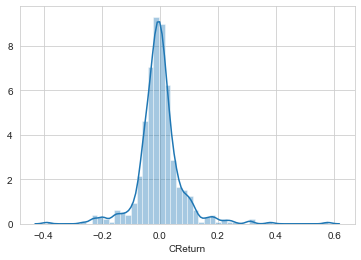

In [18]:
sns.distplot(returns.ix["2008-01-01":'2009-12-31']['CReturn'])


5. plot showing Close price for each bank

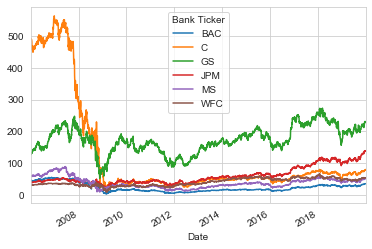

In [19]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

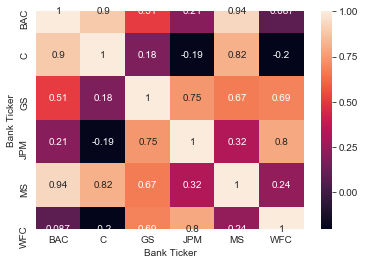

In [20]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

4. Moving Average:
Plot the rolling 30 day average against the Close Price for Citigroup's stock for the year 2008

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


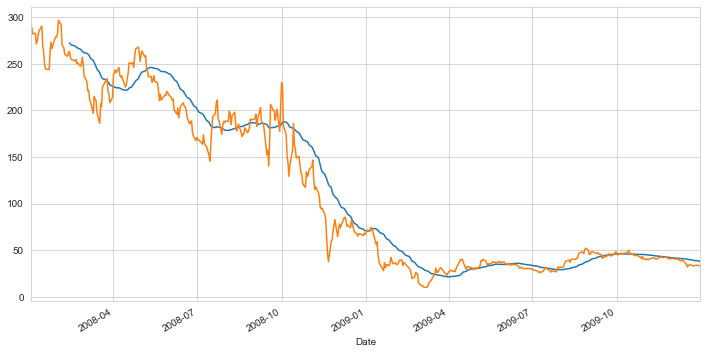

In [21]:
plt.figure(figsize=(12,6))
C['Close'].ix['2008-01-01':'2009-12-31'].rolling(window=30).mean().plot(label='30 Day Avg')
C['Close'].ix['2008-01-01':'2009-12-31'].plot(label='C CLOSE')
